#### The Demographics Files. 2003-2004 and 2005-2006. 

1. Downloaded


2. Analyzed


3. Obtain study population weights. 

In [1]:
import pandas as pd
import json

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Combine demographics files

In [2]:
# Combining demographics files

# File paths
file_c_path = '../data/raw_data/2003-2004a/demo_C.csv'
file_d_path = '../data/raw_data/2005-2006/demo_D.csv'
combined_file_path = '../data/dataCombined/combined_demo_2003_2006.csv' 

# Load the CSV files
df_c = pd.read_csv(file_c_path)
df_d = pd.read_csv(file_d_path)



# Add a source column to indicate the year
df_c['SourceYear'] = 2003
df_d['SourceYear'] = 2005

# Combine the dataframes
combined_demo_df = pd.concat([df_c, df_d], ignore_index=True)

# Ensure SEQN is the first column
if 'SEQN' in combined_demo_df.columns:
    columns = ['SEQN'] + [col for col in combined_demo_df.columns if col != 'SEQN']
    combined_df = combined_demo_df[columns]
    
# Save the combined dataframe to CSV
combined_demo_df.to_csv(combined_file_path, index=False)

#### Load the combined demographics file

In [3]:
combined_file_path = '../data/dataCombined/combined_demo_2003_2006.csv' 
df_demo = pd.read_csv(combined_file_path)

#### Describe file 

In [4]:
df_demo.shape


(20470, 46)

In [5]:
df_demo.head()


,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,MIALANG,MIAPROXY,MIAINTRP,AIALANG,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,SourceYear,DMDFMSIZ
0,21005.0,3.0,2.0,1.0,1.0,19.0,232.0,233.0,4.0,2.0,...,1.0,2.0,2.0,1.0,5512.320949,5824.782465,2.0,39.0,2003,NaN
1,21006.0,3.0,2.0,2.0,2.0,16.0,203.0,205.0,4.0,2.0,...,1.0,2.0,2.0,1.0,5422.140453,5564.039715,1.0,41.0,2003,NaN
2,21007.0,3.0,2.0,1.0,2.0,14.0,172.0,172.0,3.0,1.0,...,1.0,2.0,2.0,1.0,39764.177412,40591.066325,2.0,35.0,2003,NaN
3,21008.0,3.0,2.0,2.0,1.0,17.0,208.0,209.0,4.0,2.0,...,1.0,2.0,2.0,1.0,5599.499351,5696.750596,1.0,32.0,2003,NaN
4,21009.0,3.0,2.0,2.0,1.0,55.0,671.0,672.0,3.0,1.0,...,1.0,2.0,2.0,1.0,97593.678977,97731.727244,2.0,31.0,2003,NaN


In [6]:
df_demo.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,MIALANG,MIAPROXY,MIAINTRP,AIALANG,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,SourceYear,DMDFMSIZ
count,20470.000000,20470.000000,20470.000000,19593.000000,20470.000000,20470.000000,20077.000000,19207.000000,20470.000000,10122.000000,...,13569.000000,13569.000000,13569.000000,12034.000000,20470.000000,20470.000000,20470.000000,20470.000000,20470.000000,10348.000000
mean,31239.500000,3.505520,1.957157,1.518655,1.509038,29.018466,340.506400,339.293018,2.800244,2.002766,...,1.085268,1.994767,1.995947,1.086422,28228.610107,28228.610107,1.502785,43.456522,2004.011041,3.713568
std,5909.324341,0.499982,0.202508,0.499665,0.499931,24.731428,284.263584,282.871393,1.223282,1.047528,...,0.279290,0.072149,0.063539,0.280998,26948.526835,28193.309945,0.500004,8.633518,0.999963,1.749595
min,21005.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1224.968032,0.000000,1.000000,29.000000,2003.000000,1.000000
25%,26122.250000,3.000000,2.000000,1.000000,1.000000,9.000000,116.000000,116.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,7051.809390,6694.831015,1.000000,36.000000,2003.000000,2.000000
50%,31239.500000,4.000000,2.000000,2.000000,2.000000,19.000000,230.000000,230.000000,3.000000,2.000000,...,1.000000,2.000000,2.000000,1.000000,18938.834459,18320.597123,2.000000,44.000000,2005.000000,4.000000
75%,36356.750000,4.000000,2.000000,2.000000,2.000000,47.000000,546.000000,544.000000,4.000000,3.000000,...,1.000000,2.000000,2.000000,1.000000,39988.299520,40419.186113,2.000000,51.000000,2005.000000,5.000000
max,41474.000000,4.000000,2.000000,2.000000,2.000000,85.000000,1019.000000,1019.000000,5.000000,5.000000,...,2.000000,2.000000,2.000000,2.000000,156319.657778,159302.775182,2.000000,58.000000,2005.000000,7.000000


In [7]:
df_demo.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIDEXMON', 'RIAGENDR', 'RIDAGEYR',
       'RIDAGEMN', 'RIDAGEEX', 'RIDRETH1', 'RIDRETH2', 'DMQMILIT', 'DMDBORN',
       'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDEDUC', 'DMDSCHOL',
       'DMDMARTL', 'DMDHHSIZ', 'INDHHINC', 'INDFMINC', 'INDFMPIR', 'RIDEXPRG',
       'DMDHRGND', 'DMDHRAGE', 'DMDHRBRN', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU',
       'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP',
       'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANG', 'WTINT2YR', 'WTMEC2YR',
       'SDMVPSU', 'SDMVSTRA', 'SourceYear', 'DMDFMSIZ'],
      dtype='object')

In [8]:
df_demo.isnull().sum()

SEQN              0
SDDSRVYR          0
RIDSTATR          0
RIDEXMON        877
RIAGENDR          0
RIDAGEYR          0
RIDAGEMN        393
RIDAGEEX       1263
RIDRETH1          0
RIDRETH2      10348
DMQMILIT       8704
DMDBORN           0
DMDCITZN          0
DMDYRSUS      17478
DMDEDUC3      13701
DMDEDUC2      10450
DMDEDUC       12092
DMDSCHOL      14159
DMDMARTL       7006
DMDHHSIZ          0
INDHHINC        761
INDFMINC        268
INDFMPIR       1121
RIDEXPRG      13967
DMDHRGND          1
DMDHRAGE          1
DMDHRBRN        677
DMDHREDU        676
DMDHRMAR        622
DMDHSEDU       9535
SIALANG           2
SIAPROXY          2
SIAINTRP          2
FIALANG         252
FIAPROXY        252
FIAINTRP        252
MIALANG        6901
MIAPROXY       6901
MIAINTRP       6901
AIALANG        8436
WTINT2YR          0
WTMEC2YR          0
SDMVPSU           0
SDMVSTRA          0
SourceYear        0
DMDFMSIZ      10122
dtype: int64

#### Select columns:
['SEQN', 'SDDSRVYR', 'RIDEXMON', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDAGEEX', 'RIDRETH1','WTINT2YR', 'WTMEC2YR','SourceYear',

Not selected:
 'RIDSTATR', 'RIDRETH2', 'DMQMILIT', 'DMDBORN',
       'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDEDUC', 'DMDSCHOL',
       'DMDMARTL', 'DMDHHSIZ', 'INDHHINC', 'INDFMINC', 'INDFMPIR', 'RIDEXPRG',
       'DMDHRGND', 'DMDHRAGE', 'DMDHRBRN', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU',
       'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP',
       'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANG', 
       'SDMVPSU', 'SDMVSTRA',  'DMDFMSIZ']

Codebook:
Codebook
SEQN - Respondent sequence number
SDDSRVYR - Data Release Number
RIDSTATR - Interview/Examination Status
RIDEXMON - Six month time period
RIAGENDR - Gender
RIDAGEYR - Age at Screening Adjudicated - Recode
RIDAGEMN - Age in Months - Recode
RIDAGEEX - Exam Age in Months - Recode
RIDRETH1 - Race/Ethnicity - Recode
RIDRETH2 - Linked NH3 Race/Ethnicity - Recode
DMQMILIT - Veteran/Military Status
DMDBORN - Country of Birth - Recode
DMDCITZN - Citizenship Status
DMDYRSUS - Length of time in US
DMDEDUC3 - Education Level - Children/Youth 6-19
DMDEDUC2 - Education Level - Adults 20+
DMDEDUC - Education - Recode (old version)
DMDSCHOL - Now attending school?
DMDMARTL - Marital Status
DMDHHSIZ - Total number of people in the Household
INDHHINC - Annual Household Income
INDFMINC - Annual Family Income
INDFMPIR - Family PIR
RIDEXPRG - Pregnancy Status at Exam - Recode
DMDHRGND - HH Ref Person Gender
DMDHRAGE - HH Ref Person Age
DMDHRBRN - HH Ref Person Country of Birth
DMDHREDU - HH Ref Person Education Level
DMDHRMAR - HH Ref Person Marital Status
DMDHSEDU - HH Ref Person's Spouse Education Level
SIALANG - Language of SP Interview
SIAPROXY - Proxy used in SP Interview?
SIAINTRP - Interpreter used in SP Interview?
FIALANG - Language of Family Interview
FIAPROXY - Proxy used in Family Interview?
FIAINTRP - Interpreter used in Family Interview?
MIALANG - Language of MEC Interview
MIAPROXY - Proxy used in MEC Interview?
MIAINTRP - Interpreter used in MEC Interview?
AIALANG - Language of ACASI Interview
WTINT2YR - Full Sample 2 Year Interview Weight
WTMEC2YR - Full Sample 2 Year MEC Exam Weight
SDMVPSU - Masked Variance Pseudo-PSU
SDMVSTRA - Masked Variance Pseudo-Stratum


In [9]:
## ['SEQN', 'SDDSRVYR', 'RIDEXMON', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDAGEEX', 'RIDRETH1','WTINT2YR', 'WTMEC2YR','SourceYear'

df_demo.drop(['RIDSTATR', 'RIDRETH2', 'DMQMILIT', 'DMDBORN',
       'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDEDUC', 'DMDSCHOL',
       'DMDMARTL', 'DMDHHSIZ', 'INDHHINC', 'INDFMINC', 'INDFMPIR', 'RIDEXPRG',
       'DMDHRGND', 'DMDHRAGE', 'DMDHRBRN', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU',
       'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP',
       'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANG', 
       'SDMVPSU', 'SDMVSTRA',  'DMDFMSIZ'], axis=1, inplace=True)

In [10]:
df_demo.head()

,SEQN,SDDSRVYR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,WTINT2YR,WTMEC2YR,SourceYear
0,21005.0,3.0,1.0,1.0,19.0,232.0,233.0,4.0,5512.320949,5824.782465,2003
1,21006.0,3.0,2.0,2.0,16.0,203.0,205.0,4.0,5422.140453,5564.039715,2003
2,21007.0,3.0,1.0,2.0,14.0,172.0,172.0,3.0,39764.177412,40591.066325,2003
3,21008.0,3.0,2.0,1.0,17.0,208.0,209.0,4.0,5599.499351,5696.750596,2003
4,21009.0,3.0,2.0,1.0,55.0,671.0,672.0,3.0,97593.678977,97731.727244,2003


In [11]:
df_demo.isnull().sum()

SEQN             0
SDDSRVYR         0
RIDEXMON       877
RIAGENDR         0
RIDAGEYR         0
RIDAGEMN       393
RIDAGEEX      1263
RIDRETH1         0
WTINT2YR         0
WTMEC2YR         0
SourceYear       0
dtype: int64

In [12]:
# Calculate the percentage of missing values for each column
missing_values_percent = (df_demo.isnull().sum() / len(df_demo)) * 100

print("Percentage of missing values per column:")
print(missing_values_percent)

Percentage of missing values per column:
SEQN          0.000000
SDDSRVYR      0.000000
RIDEXMON      4.284319
RIAGENDR      0.000000
RIDAGEYR      0.000000
RIDAGEMN      1.919883
RIDAGEEX      6.170005
RIDRETH1      0.000000
WTINT2YR      0.000000
WTMEC2YR      0.000000
SourceYear    0.000000
dtype: float64


###

#### Analyzing the combined demographics file 


Load the Combined Demographics File: Read combined_demo_2003_2006.csv.


Descriptive Statistics: Compute summary statistics for RIAGENDR and RIDAGEYR.


Visualize with Histograms: Display the distributions of gender and age.


=== Descriptive Statistics ===

Unique values in RIAGENDR:
[1. 2.]

Data type of RIAGENDR: float64

Gender Distribution:
RIAGENDR
2.0    10420
1.0    10050
Name: count, dtype: int64
Percentage Male (1): 49.10%
Percentage Female (2): 50.90%

Age Statistics:
count    20470.000000
mean        29.018466
std         24.731428
min          0.000000
25%          9.000000
50%         19.000000
75%         47.000000
max         85.000000
Name: RIDAGEYR, dtype: float64


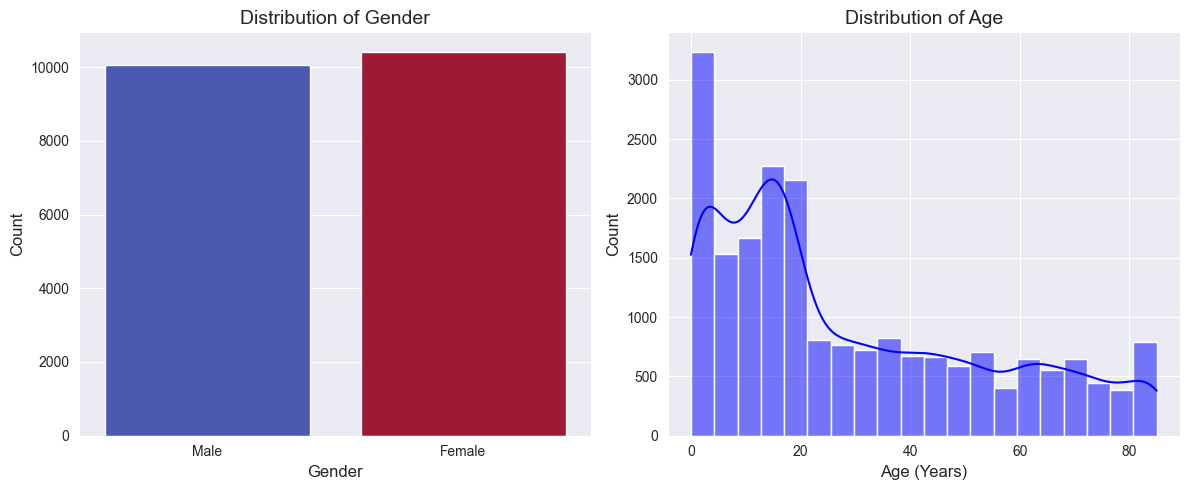

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the combined demographics file
df = pd.read_csv('../data/dataCombined/combined_demo_2003_2006.csv')

# Step 2: Descriptive Statistics
print("\n=== Descriptive Statistics ===")

# Inspect RIAGENDR column
print("\nUnique values in RIAGENDR:")
print(df['RIAGENDR'].unique())
print("\nData type of RIAGENDR:", df['RIAGENDR'].dtype)

# Statistics for gender (RIAGENDR)
print("\nGender Distribution:")
gender_counts = df['RIAGENDR'].value_counts(dropna=False)
print(gender_counts)

# Determine gender labels dynamically
total = len(df)
if df['RIAGENDR'].dtype in ['int64', 'float64']:
    # Assume 1 = Male, 2 = Female (common NHANES coding)
    male_count = gender_counts.get(1, 0)
    female_count = gender_counts.get(2, 0)
    print(f"Percentage Male (1): {(male_count / total * 100):.2f}%")
    print(f"Percentage Female (2): {(female_count / total * 100):.2f}%")
else:
    # If strings, use the most frequent labels
    if 'Female' in gender_counts.index:
        female_percent = gender_counts['Female'] / total * 100
        male_percent = gender_counts['Male'] / total * 100
        print(f"Percentage Female: {female_percent:.2f}%")
        print(f"Percentage Male: {male_percent:.2f}%")
    else:
        print("Gender labels not recognized as 'Female' or 'Male'. Please check the data dictionary.")

# Statistics for age (RIDAGEYR)
print("\nAge Statistics:")
print(df['RIDAGEYR'].describe())

# Step 3: Visualize with Histograms
plt.figure(figsize=(12, 5))

# Histogram for Gender (updated to use hue instead of palette)
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='RIAGENDR', hue='RIAGENDR', palette='coolwarm', legend=False)
plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Add custom labels if numeric
if df['RIAGENDR'].dtype in ['int64', 'float64']:
    plt.xticks(ticks=[0, 1], labels=['Unknown', 'Male', 'Female'][1:3] if len(df['RIAGENDR'].unique()) == 2 else df['RIAGENDR'].unique())

# Histogram for Age
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='RIDAGEYR', bins=20, kde=True, color='blue')
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.savefig('gender_age_distributions_combined_demo.png', dpi=100)
plt.show()

#### Splitting the combined data in demographic set into "younger" and "older" at age 25


=== Summary Statistics ===

Total Records: 20470

Young Dataset (< 25 years):
Number of Records: 11459
count    11459.000000
mean        10.404398
std          7.037205
min          0.000000
25%          4.000000
50%         11.000000
75%         16.000000
max         24.000000
Name: RIDAGEYR, dtype: float64

Old Dataset (>= 25 years):
Number of Records: 9011
count    9011.000000
mean       52.689380
std        18.042303
min        25.000000
25%        37.000000
50%        51.000000
75%        68.000000
max        85.000000
Name: RIDAGEYR, dtype: float64

Gender Distribution in Young Dataset:
RIAGENDR
2.0    5772
1.0    5687
Name: count, dtype: int64

Gender Distribution in Old Dataset:
RIAGENDR
2.0    4648
1.0    4363
Name: count, dtype: int64

=== Validation Summary ===
Total Records in Original Dataset: 20470
Records in Young Dataset (< 25 years): 11459
Records in Old Dataset (>= 25 years): 9011
Total Records After Split: 20470


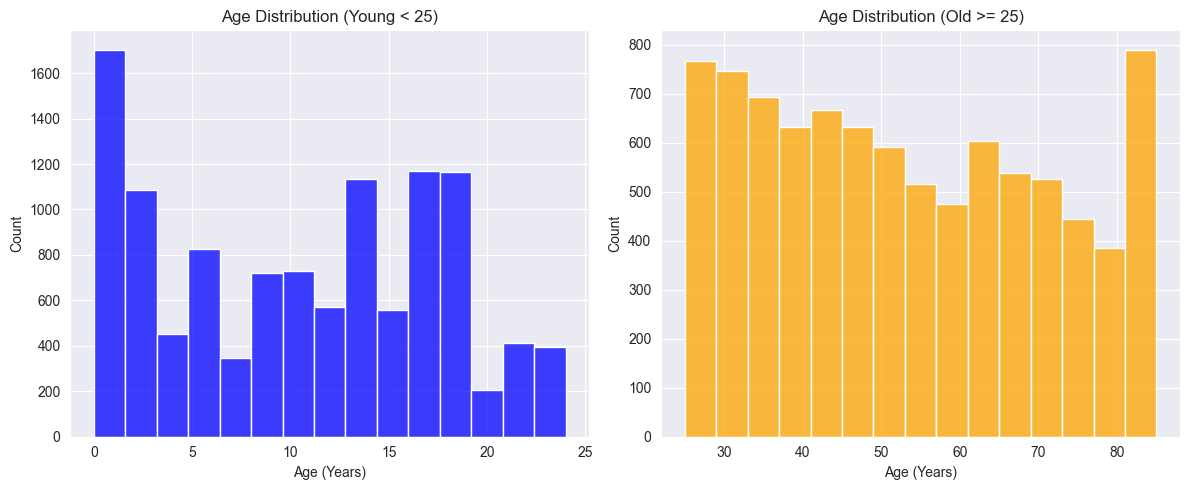

In [17]:
import pandas as pd

# Step 1: Load the combined demographics file
df = pd.read_csv('../data/dataCombined/combined_demo_2003_2006.csv')

# Step 2: Split the data into young and old datasets
young_df = df[df['RIDAGEYR'] < 25].copy()
old_df = df[df['RIDAGEYR'] >= 25].copy()

# Step 3: Save the datasets as CSV files
young_df.to_csv('young_demo_2003_2006.csv', index=False)
old_df.to_csv('old_demo_2003_2006.csv', index=False)

# Step 4: Save the datasets as CSV files
young_df.to_csv('NHANES_young_demo_2003_2006.csv', index=False)
old_df.to_csv('NHANES_old_demo_2003_2006.csv', index=False)

# Step 5: Print summary statistics for validation
print("\n=== Summary Statistics ===")
print("\nTotal Records:", len(df))
print("\nYoung Dataset (< 25 years):")
print(f"Number of Records: {len(young_df)}")
print(young_df['RIDAGEYR'].describe())
print("\nOld Dataset (>= 25 years):")
print(f"Number of Records: {len(old_df)}")
print(old_df['RIDAGEYR'].describe())

# Verify gender distribution in each split
print("\nGender Distribution in Young Dataset:")
print(young_df['RIAGENDR'].value_counts(dropna=False))
print("\nGender Distribution in Old Dataset:")
print(old_df['RIAGENDR'].value_counts(dropna=False))

# Step 6: Print validation summary
print("\n=== Validation Summary ===")
print(f"Total Records in Original Dataset: {len(df)}")
print(f"Records in Young Dataset (< 25 years): {len(young_df)}")
print(f"Records in Old Dataset (>= 25 years): {len(old_df)}")
print(f"Total Records After Split: {len(young_df) + len(old_df)}")



# Visualize the splits
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=young_df, x='RIDAGEYR', bins=15, color='blue')
plt.title('Age Distribution (Young < 25)', fontsize=12)
plt.xlabel('Age (Years)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.subplot(1, 2, 2)
sns.histplot(data=old_df, x='RIDAGEYR', bins=15, color='orange')
plt.title('Age Distribution (Old >= 25)', fontsize=12)
plt.xlabel('Age (Years)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.savefig('age_distributions_split_25.png', dpi=100)
plt.show()

In [18]:
# Verify a few rows from each dataset
print("\nSample from Young Dataset (first 2 rows):")
print(young_df.head(2))
print("\nSample from Old Dataset (first 2 rows):")
print(old_df.head(2))


Sample from Young Dataset (first 2 rows):
      SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  \
0  21005.0       3.0       2.0       1.0       1.0      19.0     232.0   
1  21006.0       3.0       2.0       2.0       2.0      16.0     203.0   

   RIDAGEEX  RIDRETH1  RIDRETH2  ...  MIALANG  MIAPROXY  MIAINTRP  AIALANG  \
0     233.0       4.0       2.0  ...      1.0       2.0       2.0      1.0   
1     205.0       4.0       2.0  ...      1.0       2.0       2.0      1.0   

      WTINT2YR     WTMEC2YR  SDMVPSU  SDMVSTRA  SourceYear  DMDFMSIZ  
0  5512.320949  5824.782465      2.0      39.0        2003       NaN  
1  5422.140453  5564.039715      1.0      41.0        2003       NaN  

[2 rows x 46 columns]

Sample from Old Dataset (first 2 rows):
      SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  \
4  21009.0       3.0       2.0       2.0       1.0      55.0     671.0   
5  21010.0       3.0       2.0       2.0       2.0      52.0     633.0   


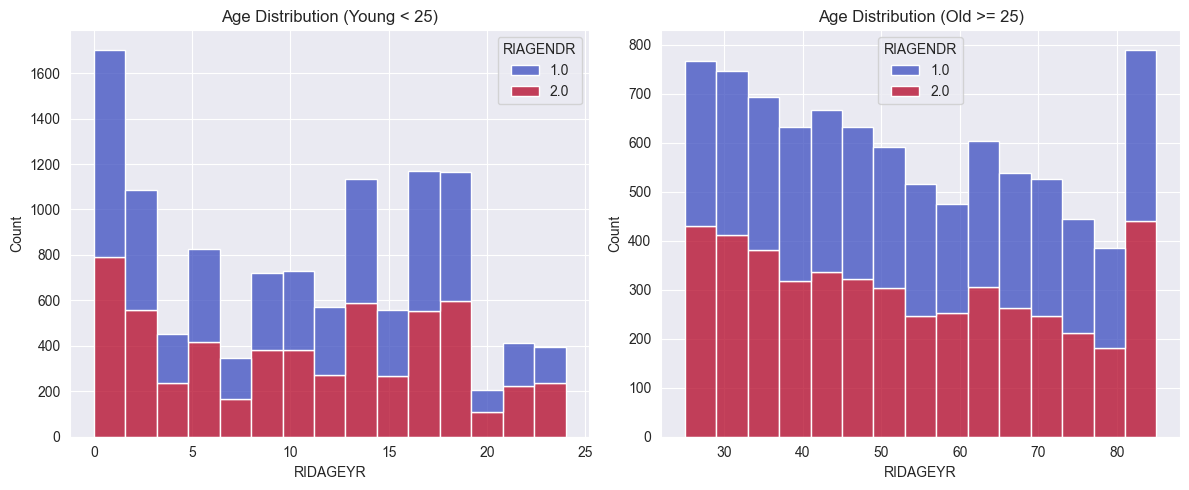

In [19]:
##Regenerate and enhance them (adding gender hues): The histograms are saved as `age_distributions_split_25_with_gender.png`.

import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=young_df, x='RIDAGEYR', bins=15, hue='RIAGENDR', palette='coolwarm', multiple='stack')
plt.title('Age Distribution (Young < 25)')
plt.subplot(1, 2, 2)
sns.histplot(data=old_df, x='RIDAGEYR', bins=15, hue='RIAGENDR', palette='coolwarm', multiple='stack')
plt.title('Age Distribution (Old >= 25)')
plt.tight_layout()
plt.savefig('age_distributions_split_25_with_gender.png', dpi=100)
plt.show()

#### Select columns from the older set for further use and merging with the comprehensive set (which includes BMX, BPX, and lab data). I will be using the older set to filter the comprehensive set.

#### Dropping columns from the older data set:

Keeping:

['SEQN', 'SDDSRVYR', 'RIDEXMON', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDAGEEX', 'RIDRETH1','WTINT2YR', 'WTMEC2YR','SourceYear'

Dropping:


old_df.drop(['RIDSTATR', 'RIDRETH2', 'DMQMILIT', 'DMDBORN',
       'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDEDUC', 'DMDSCHOL',
       'DMDMARTL', 'DMDHHSIZ', 'INDHHINC', 'INDFMINC', 'INDFMPIR', 'RIDEXPRG',
       'DMDHRGND', 'DMDHRAGE', 'DMDHRBRN', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU',
       'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP',
       'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANG', 
       'SDMVPSU', 'SDMVSTRA',  'DMDFMSIZ'], axis=1, inplace=True)
       

And save to: NHANES_older_demographics_weights_2003_2006.csv

In [20]:
old_df.drop(['RIDSTATR', 'RIDRETH2', 'DMQMILIT', 'DMDBORN', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDEDUC', 'DMDSCHOL', 'DMDMARTL', 'DMDHHSIZ', 'INDHHINC', 'INDFMINC', 'INDFMPIR', 'RIDEXPRG', 'DMDHRGND', 'DMDHRAGE', 'DMDHRBRN', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANG', 'SDMVPSU', 'SDMVSTRA', 'DMDFMSIZ'], axis=1, inplace=True)

old_df.to_csv('NHANES_older_demographics_weights_2003_2006.csv', index=False)

In [21]:
old_df.head()

,SEQN,SDDSRVYR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,WTINT2YR,WTMEC2YR,SourceYear
4,21009.0,3.0,2.0,1.0,55.0,671.0,672.0,3.0,97593.678977,97731.727244,2003
5,21010.0,3.0,2.0,2.0,52.0,633.0,634.0,3.0,39599.362689,43286.576474,2003
7,21012.0,3.0,2.0,1.0,63.0,765.0,766.0,4.0,12629.440480,12947.338142,2003
10,21015.0,3.0,2.0,1.0,83.0,1006.0,1007.0,3.0,17625.875727,19994.159857,2003
12,21017.0,3.0,1.0,2.0,37.0,444.0,445.0,1.0,26619.833543,26802.589075,2003


In [22]:
old_df.columns

Index(['SEQN', 'SDDSRVYR', 'RIDEXMON', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDAGEEX', 'RIDRETH1', 'WTINT2YR', 'WTMEC2YR', 'SourceYear'],
      dtype='object')


=== Descriptive Statistics ===

Unique values in RIAGENDR:
[1. 2.]

Data type of RIAGENDR: float64

Gender Distribution:
RIAGENDR
2.0    4648
1.0    4363
Name: count, dtype: int64
Percentage Male (1): 48.42%
Percentage Female (2): 51.58%

Age Statistics:
count    9011.000000
mean       52.689380
std        18.042303
min        25.000000
25%        37.000000
50%        51.000000
75%        68.000000
max        85.000000
Name: RIDAGEYR, dtype: float64


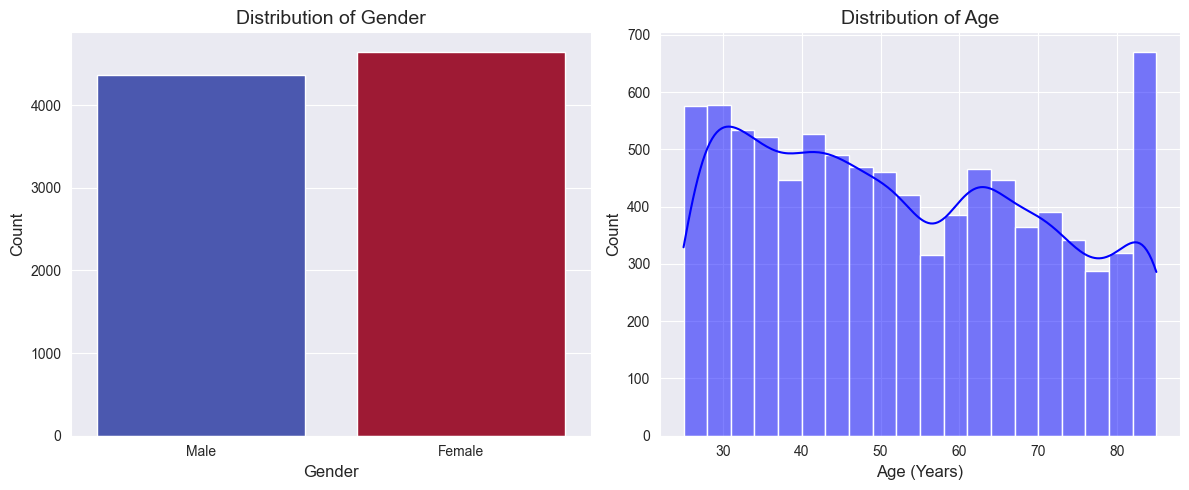

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the older filtered combined demographics file
df = pd.read_csv('../data/NHANES_older_demographics_weights_2003_2006.csv')

# Step 2: Descriptive Statistics
print("\n=== Descriptive Statistics ===")

# Inspect RIAGENDR column
print("\nUnique values in RIAGENDR:")
print(df['RIAGENDR'].unique())
print("\nData type of RIAGENDR:", df['RIAGENDR'].dtype)

# Statistics for gender (RIAGENDR)
print("\nGender Distribution:")
gender_counts = df['RIAGENDR'].value_counts(dropna=False)
print(gender_counts)

# Determine gender labels dynamically
total = len(df)
if df['RIAGENDR'].dtype in ['int64', 'float64']:
    # 1 = Male, 2 = Female (common NHANES coding)
    male_count = gender_counts.get(1, 0)
    female_count = gender_counts.get(2, 0)
    print(f"Percentage Male (1): {(male_count / total * 100):.2f}%")
    print(f"Percentage Female (2): {(female_count / total * 100):.2f}%")
else:
    # If strings, use the most frequent labels
    if 'Female' in gender_counts.index:
        female_percent = gender_counts['Female'] / total * 100
        male_percent = gender_counts['Male'] / total * 100
        print(f"Percentage Female: {female_percent:.2f}%")
        print(f"Percentage Male: {male_percent:.2f}%")
    else:
        print("Gender labels not recognized as 'Female' or 'Male'")

# Statistics for age (RIDAGEYR)
print("\nAge Statistics:")
print(df['RIDAGEYR'].describe())

# Step 3: Visualize with Histograms
plt.figure(figsize=(12, 5))

# Histogram for Gender (use hue instead of palette)
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='RIAGENDR', hue='RIAGENDR', palette='coolwarm', legend=False)
plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Add custom labels if numeric
if df['RIAGENDR'].dtype in ['int64', 'float64']:
    plt.xticks(ticks=[0, 1], labels=['Unknown', 'Male', 'Female'][1:3] if len(df['RIAGENDR'].unique()) == 2 else df['RIAGENDR'].unique())

# Histogram for Age
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='RIDAGEYR', bins=20, kde=True, color='blue')
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.savefig('gender_age_distributions_combined_demo.png', dpi=100)
plt.show()

In [24]:
df.isnull().sum()

SEQN            0
SDDSRVYR        0
RIDEXMON      468
RIAGENDR        0
RIDAGEYR        0
RIDAGEMN      393
RIDAGEEX      831
RIDRETH1        0
WTINT2YR        0
WTMEC2YR        0
SourceYear      0
dtype: int64

Columns with missing values:

RIDEXMON (468 missing)


RIDAGEMN (393 missing)


RIDAGEEX (831 missing)

These columns represent examination month, age in months, and exact age, respectively, and their missingness might be due to incomplete interview or exam data. Dropping them will leave only columns with complete data.

In [26]:
# Step 1: Drop columns with missing values based on provided counts
columns_with_missing = ['RIDEXMON', 'RIDAGEMN', 'RIDAGEEX']
df.drop(columns=columns_with_missing, axis=1, inplace=True)

# Step 2: Save the updated dataset
df.to_csv('../data/NHANES_older_demographics_weights_2003_2006_cleaned.csv', index=False)

# Step 5: Validate the result
print("\n=== Validation Summary ===")
print(f"Number of Records: {len(df)}")
print(f"Remaining Columns: {list(df.columns)}")
print(f"Sample of first 5 rows:")
print(df.head())

# Check for missing data in remaining columns
print("\n=== Missing Values in Remaining Columns ===")
print(df.isnull().sum())

KeyError: "['RIDEXMON', 'RIDAGEMN', 'RIDAGEEX'] not found in axis"

#### Next step is merging the older participants data set with the comprehensive 'nhanes_final_comprehensive_data_updated.csv containing the BMX, BPX, and lab data in the next notebook .